In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from google.colab import files
uploaded = files.upload()

Saving content.csv to content.csv


In [ ]:
import io
loan_dataset = pd.read_csv(io.BytesIO(uploaded['content.csv']))

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
0         1        1          1          1              0             4583   
1         1        1          4          1              0             3036   
2         1        1          1          1              0            12841   
3         1        0          0          1              0             1853   
4         0        0          0          1              0             3510   
..      ...      ...        ...        ...            ...              ...   
609       1        1          0          1              0             3232   
610       0        0          0          1              0             2900   
611       1        1          4          1              0             4106   
612       1        1          1          1              0             8072   
613       1        1          2          1              0             7583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

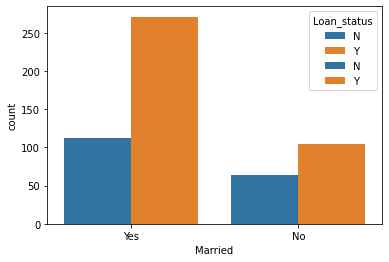

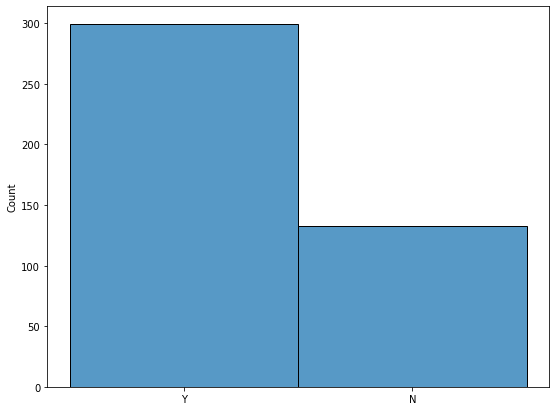

In [ ]:
loan_dataset.isnull().sum()
loan_dataset = loan_dataset.dropna()
loan_dataset.isnull().sum()
loan_dataset.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)
loan_dataset
loan_dataset['Dependents'].value_counts()
loan_dataset = loan_dataset.replace(to_replace='3+', value=4)
loan_dataset['Dependents'].value_counts()
loan_dataset.columns
sns.countplot(x='Education',hue='Loan_status',data=loan_dataset)
sns.countplot(x='Married',hue='Loan_status',data=loan_dataset)
loan_dataset.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)
X = loan_dataset.drop(columns=['Loan_ID','Loan_status'],axis=1)
Y = loan_dataset['Loan_status']
print(X)
print(Y)

X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=2)
X_train
print(X.shape, X_train.shape, X_test.shape)
from sklearn.tree import DecisionTreeClassifier
dtree= DecisionTreeClassifier(max_leaf_nodes=3)
dtree.fit(X_train,Y_train)
predictions= dtree.predict(X_train)
predictions

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Y_train,predictions))
print(confusion_matrix(Y_train,predictions))
plt.figure(figsize=(9,7))
sns.histplot(predictions)
training_data_accuray = accuracy_score(predictions,Y_train)
print('Accuracy on training data : ', training_data_accuray*100,"%")
prediction=dtree.predict(X_test)
test_data_accuray = accuracy_score(prediction,Y_test)
print('Accuracy on test data : ', test_data_accuray*100,"%")
import warnings
warnings.filterwarnings('ignore')
k = [1,0,0,1,0,3500,0.0,81.0,300.0,1.0,1,637]
if(dtree.predict([k])[0]!='N' and k[-1]<=500):
  print("NO")
elif(k[-1]>500 and k[-1]<=600):
  print("YES")
  print("Eligible upto 500000")
elif(k[-1]>600 and k[-1]<=700):
  print("YES")
  print("Eligible upto 1000000")
elif(k[-1]>700 and k[-1]<=800):
  print("YES") 
  print("Eligible upto 1500000")
elif(k[-1]>800 and k[-1]<=900):
  print("YES")
  print("Eligible upto 2000000")
  